### Student Information
Name: Yi Chun Lai

Student ID: 109072510

GitHub ID: y4c6

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip) by right-clicking it and open as a new tab. The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [2]:
### Begin Assignment Here

---

* Summary for instructions
1. [x] Finish take home assignment from Lab ntebook.
2. [?] Follow the same process above
    - [x] Download '/sentiment labelled sentences/'
    - [x] Read the specifications of the datasset
    - [?] Modify '/helpers/'
3. [x] New attemps
    - [x] new Visualization
    - [x] TF-IDF
    - [x] Naive Bayes classifier
4. [x] Data pre-processing
5. [?] Tidy up.

---

## 2. follow Lab notebook

* Outline of Lab notebook
1. data preparation: load data, read and familiar the data.

2. data transformation:
    - 2.1. converting to pd.DF
    - 2.2. add labels, like a long DF
    
3. data mining
    - 3.1. missing value; 
        ```
        X.isnull()
        X.dropna(inplace=True)
        ```
    - 3.2. duplicate data:
        ``` 
        X.duplicated()
        X.drop_duplicates(keep=False, inplace=True)
        ```   
4. data preprocessing
    - 4.1. sampling: `X_sample = X.sample(n=500)`; bootstraps?
    - 4.2. feature creation: tokenization; `X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))`
    - 4.3. feature subset selection: BoW;
        ``` 
        count_vect = CountVectorizer() 
        X_counts = count_vect.fit_transform(X.text)
        count_vect.get_feature_names_out()[0:1]
        ```
    - 4.4. dimensionalty reduction: PCA; `X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())`
    - 4.5. aggregation: `term_frequency`
    - 4.6. discretization: 
        ```
        mlb = preprocessing.LabelBinarizer()
        X['bin_category'] = mlb.transform(X['category']).tolist()
        ```
5. data exploration: compare the docs
    - 5.1. binarize: `from sklearn.preprocessing import binarize`
    - 5.2. consine similarity: `from sklearn.metrics.pairwise import cosine_similarity`

### Data preparation an Data transformation

In [1]:
import pandas as pd

Here I try to have the file names,
1. to iterate to read the data set
2. to play the role of `format_labels`, to put them on the `category_name`.

* should i do this in `helpers.py`?

In [2]:
import glob, os

path = 'D:/202209/DataMining/DMLab1/sentiment labelled sentences'
os.chdir(path)

file_list = []
for file in glob.glob("*.txt"):  # to fetch the dataset which extension is .txt
    if file != "readme.txt":     # to remove readme
        file_list.append(file)

file_list

['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']

In [65]:
df = pd.DataFrame()
for i in range(len(file_list)):
    file_i = pd.read_csv(file_list[i], sep="\t", header = None)
    file_i.columns = ['sentence', 'score']
    file_i['category_name'] = [file_list[i][:4]]*len(file_i)
    df = df.append(file_i)

X = df.replace('amaz', 'amazon')

C:\Users\user\AppData\Local\Temp\ipykernel_9524\629361130.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_i)
C:\Users\user\AppData\Local\Temp\ipykernel_9524\629361130.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_i)
C:\Users\user\AppData\Local\Temp\ipykernel_9524\629361130.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_i)


In [3]:
# ctaegories
categories = ['amazon', 'imdb', 'yelp']

In [38]:
# replace these step with upper steps --helper.py--
'''
amazon = pd.read_csv('amazon_cells_labelled.txt', sep="\t", header = None)
amazon['category_name'] = ['amazon']*len(amazon)
imdb = pd.read_csv('imdb_labelled.txt', sep="\t", header = None)
imdb['category_name'] = ['imdb']*len(imdb)
yelp = pd.read_csv('yelp_labelled.txt', sep='\t', header = None)
yelp['category_name'] = ['yelp']*len(yelp)

X = pd.concat([amazon, imdb, yelp])
X.columns = ['sentence','score','category_name']
'''

'\namazon = pd.read_csv(\'amazon_cells_labelled.txt\', sep="\t", header = None)\namazon[\'category_name\'] = [\'amazon\']*len(amazon)\nimdb = pd.read_csv(\'imdb_labelled.txt\', sep="\t", header = None)\nimdb[\'category_name\'] = [\'imdb\']*len(imdb)\nyelp = pd.read_csv(\'yelp_labelled.txt\', sep=\'\t\', header = None)\nyelp[\'category_name\'] = [\'yelp\']*len(yelp)\n\nX = pd.concat([amazon, imdb, yelp])\nX.columns = [\'sentence\',\'score\',\'category_name\']\n'

In [107]:
X[:5]

,sentence,score,category_name
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

yelp      992
amazon    980
imdb      742
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

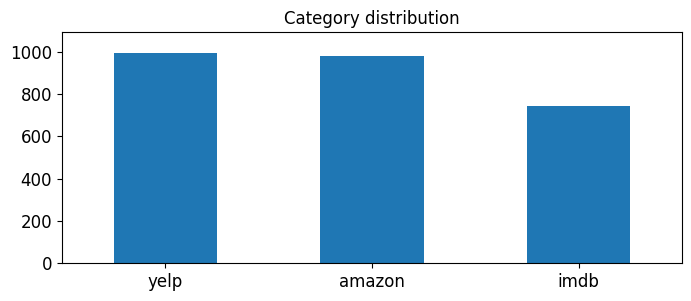

In [147]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(X.category_name.value_counts())*1.1], 
                                    rot = 0, fontsize = 12, figsize = (8,3))

### Data mining

- Missing value

In [89]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)

,sentence,score,category_name,unigrams
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


Duplicate value

In [104]:
print(sum(X.duplicated()))  # 17?
X.drop_duplicates(keep=False, inplace=True)

17


In [106]:
# to check how many records remains after removing Missing and Duplicated data.
len(X)

2714

### Data preprocessing

* Sampling

In [101]:
X_sample = X.sample(n=500)

* feature creation

In [7]:
import nltk
# my functions
import helpers.data_mining_helpers as dmh

In [109]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [110]:
X[0:3]

,sentence,score,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"


* feature subset selection

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() 

X_counts = count_vect.fit_transform(X['sentence'])

print(X_counts[0][:5])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [139]:
# count_vect.get_feature_names_out()[0:20]
# i may try to print
'''
  term     (doc, term)      count
------------------------------------
  term1    ( d1, t1 )       count1
'''

'\n  term     (doc, term)      count\n------------------------------------\n  term1    (0, 6464)       count1\n'

* dim reduction

In [9]:
from sklearn.decomposition import PCA

X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())

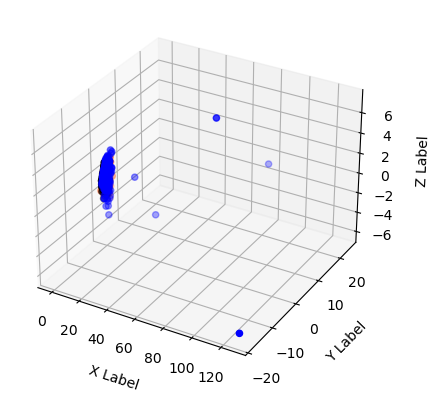

In [10]:
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # , roll=90

for c, category in zip(col, categories):
    xs = X_reduced_3D[X['category_name'] == category].T[0]
    ys = X_reduced_3D[X['category_name'] == category].T[1]
    zs = X_reduced_3D[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

* aggregation

In [11]:
import numpy as np

In [138]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [148]:
idx = np.argsort(term_frequencies)[::-1][:len(term_frequencies)][:20]

In [140]:
import plotly.express as px

In [150]:
fig = px.scatter(x = count_vect.get_feature_names_out()[idx], 
                 y = term_frequencies[idx])
fig.show()

* discretization

In [142]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [143]:
mlb = preprocessing.LabelBinarizer()

In [145]:
mlb.fit(X.category_name)

LabelBinarizer()

In [146]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()

### Data exploration

The first step to see the similarity of two random documents, is to do `binarize`. Then,
the second step is to calculate the `cosine_similarity`. 

In [151]:
from sklearn.preprocessing import binarize

In [179]:
document_to_transform_i = []

for i in np.random.randint(len(X), size=3):
    random_record_i = X.iloc[i]['sentence'] #row
    document_to_transform_i.append([random_record_i])

document_to_transform_1, document_to_transform_2, document_to_transform_3 = document_to_transform_i

In [188]:
len(document_to_transform_i)

3

In [192]:
document_vector_count_i = [*range(3)]

for i in range(3):
    document_vector_count_i[i] = count_vect.transform(document_to_transform_i[i])
    
    # what are you doing here? u don't show any after?? 
    # document_vector_count_i_bin[i] = binarize(document_vector_count_i[i])

    print(document_vector_count_i[i].todense())

print( document_vector_count_i )

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[<1x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>, <1x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>, <1x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>]


* cosine similarity

In [193]:
from sklearn.metrics.pairwise import cosine_similarity

:::
for i in range(3):
    for j in range(3):
        result = i*j
        print(f" {i+1} times {j+1} equals { result }.")
:::

In [202]:
for i in range(3):
    for j in range(3):
        cos_sim_count_i_j = cosine_similarity(document_vector_count_i[i], document_vector_count_i[j], dense_output=True)
        print(f" Cosine Similarity using count bw {i+1} and {j+1}: {cos_sim_count_i_j}.")

 Cosine Similarity using count bw 1 and 1: [[1.]].
 Cosine Similarity using count bw 1 and 2: [[0.]].
 Cosine Similarity using count bw 1 and 3: [[0.25819889]].
 Cosine Similarity using count bw 2 and 1: [[0.]].
 Cosine Similarity using count bw 2 and 2: [[1.]].
 Cosine Similarity using count bw 2 and 3: [[0.19245009]].
 Cosine Similarity using count bw 3 and 1: [[0.25819889]].
 Cosine Similarity using count bw 3 and 2: [[0.19245009]].
 Cosine Similarity using count bw 3 and 3: [[1.]].


## 3. New attemps

### 3.1. Visualisation

In [203]:
import seaborn as sns

* heatmap : to see which are common words and its frequency.

In [ ]:
counts_w_top20 = X_counts[:,idx] 
counts_w_top20 

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[idx]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = counts_w_top20[0:20,:].toarray()

#------------------------
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 vmin=0, vmax=5, annot=True)

* Word cloud: an extension for tag cloud

In [253]:
from wordcloud import WordCloud

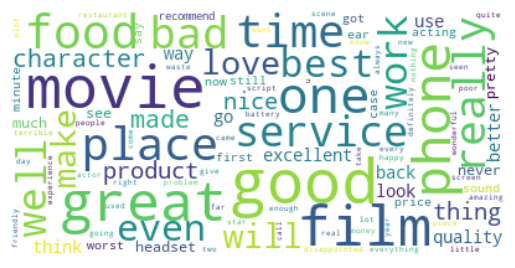

In [263]:
unique_string=(" ").join(list(X['sentence']))

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate( unique_string )
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 3.2. TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
vect = TfidfVectorizer()
X_counts = vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1013)	0.39724820817666917
  (0, 647)	0.22555088175536459
  (0, 1982)	0.2306390246139404
  (0, 4793)	0.33030032253491776
  (0, 4835)	0.2733799006395169
  (0, 4531)	0.0881625510871022
  (0, 2158)	0.22094809666369034
  (0, 2314)	0.3010444787413116
  (0, 2432)	0.1210781906805114
  (0, 3387)	0.3068538434603926
  (0, 4609)	0.12778803811565193
  (0, 2809)	0.22839244785930268
  (0, 1829)	0.15591937844583587
  (0, 4987)	0.24797344916079914
  (0, 3043)	0.22352431764234307
  (0, 2427)	0.12236392895361783
  (0, 4545)	0.2102974927707943
  (0, 4161)	0.1865424331491731


In [62]:
analyze = vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### 3.3. Naive Bayes Classifier

Three Bayes classifications are provided in sklearn
1. Bernoulli naive Bayes, ` from sklearn.naive_bayes import BernoulliNB`
2. Multinomial naive Bayes, ` from sklearn.naive_bayes import MultinomialNB`
3. Gaussian naive Bayes, ` from sklearn.naive_bayes import GaussianNB`

* Bayes:

we have *defined* a likelihood (compare this with logistic regression) which is a weight between the Apriori probability and the a posteriori one (the term on the denominator is less important because it works as normalizing factor):
$ P_{A, \text(Posteriori)} \propto Likelihood * P_{A, \text(Priori)} $

* Naive Bayes classifiers:


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.naive_bayes import BernoulliNB  # for binary
# from sklearn.naive_bayes import MultinomialNB  # for frequency
# from sklearn.naive_bayes import GaussianNB  # for whatever you like

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X_counts, X['score'].to_numpy().reshape(-1, 1), test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

c:\Users\user\anaconda3\envs\dmenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8078602620087336

## 4. Data preprocessing

* bigram
* lower case
* stopwords
* stemming
* --
* score = (0,1), logistic?

In [93]:
import nltk

In [153]:
from string import punctuation
from nltk.corpus import stopwords        # stopwords = stopwords.words('english')
from nltk.tokenize import word_tokenize
# if i use CountVectorizer, the above modeules are no needed.
from nltk.stem import PorterStemmer      # ps.stem(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [162]:
from sklearn.feature_extraction.text import CountVectorizer

stem_vectorizer = CountVectorizer(
    analyzer = stemmed_words,
    lowercase = True,
    ngram_range = (1, 2),
    stop_words = 'english')

In [163]:
result = vectorizer.fit_transform(X['sentence'])

In [164]:
X_count_preprocess = result.toarray()

In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(X_count_preprocess, X['score'].to_numpy().reshape(-1, 1), test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)  # 0.6200873362445415  #getting worse OAO

c:\Users\user\anaconda3\envs\dmenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6200873362445415